In [1]:
# Q0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

0. Write a python function that takes an X and Y vector and returns an estimated  β0  and  β1  from linear regression. Check your function versus one of the prewritten ones. Include this in code cells of your ipython notebook.

In [2]:
def linear(x, y):  
    xmean=np.mean(x)
    ymean = np.mean(y)
    # Calculate the terms needed for the numator and denominator of beta
    b1_num = ((x - xmean) * (y - ymean)).sum()
    b1_deno = ((x - xmean)**2).sum()
    # Calculate beta 1
    b1=b1_num/b1_deno
    b0 = ymean - (b1 * xmean)
    reg_line = 'y = {} + {}x'.format(round(b0,3), round(b1, 3))
    return (round(b0,3), round(b1,3) ,reg_line)



In [3]:
arr_x = input("X")    
x = [int(n) for n in arr_x.split(",")] 
arr_y = input("Y")    
y = [int(n) for n in arr_y.split(",")] 

linear(x,y)

X 1,2,3,4
Y 2,3,4,5


(1.0, 1.0, 'y = 1.0 + 1.0x')

In [3]:
#### Generate 'random' data
np.random.seed(0)
x = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * x + res                  # Actual values of Y

df = pd.DataFrame(
    {'x': x,
     'y': y})
df.head()

linear(x,y)

(2.003, 0.323, 'y = 2.003 + 0.323x')

In [10]:
##linear regression

#Question 1. Using Python and basic numpy functions, fit a linear regression model to the kirby 21 dataset into colab for the left telencelphalon (predictor) to the right telencephalon (outcome). Also, do the same reversing the predictor and response relationship. Do a scatterplot of the left telencephalon (type 1 level 1) volume by the right. Do not hold out any data (there's only 21 observations).

In [3]:
# Q1

subjectData  = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")
leftR = subjectData.loc[ (subjectData.roi == "Telencephalon_L")]
rightR = subjectData.loc[ (subjectData.roi == "Telencephalon_R")]

response = [int(n) for n in rightR.volume] 
predictor = [int(n) for n in leftR.volume] 

#print(len(predictor))
#print(len(response))


linear(predictor, response)

(-13875.945, 1.044, 'y = -13875.945 + 1.044x')

In [4]:
#reverse the predictor and response relationship

linear(response, predictor)

(17150.431, 0.95, 'y = 17150.431 + 0.95x')

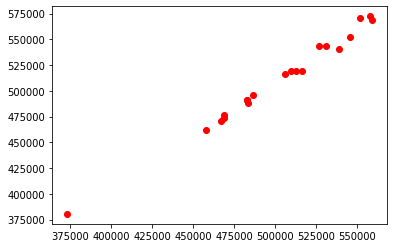

In [5]:
plt.plot(predictor, response, 'o', color='red')

#Question 2. Consider a regression through the origin model Y=BX . What would be the impact on the estimate of B if we replaced X by cX where c is a positive constant? Write your answer in a markdown cell of your ipython notebook.

The estimate B will decrease if we replaced x by cx if c is a positive constant...
Y=BX=(B/c)*(cX)



_Therefore, B/c < B _

#Question 3. Let  Xi  be a group indicator so that  xi=I(i∈G1)  I.e. takes the value 1 when  i  is in group 1 and 0 if i is in group 0. Consider optimizing  ∑i1n(Yi−β0−β1Xi)2 . If  Y^=β^0+β^1X , argue that  Y^  is the group mean for group 1 if  X=1  and the group mean for group 0 if  X=0 . You can either make a text argument in a markdown cell, or create a simulated example and show that the results holds.

In [6]:
#simulated example
x= np.random.randint(0,2,10)
y= np.random.randint(10,size=10)
mm = zip(x,y)
rp=list(mm)

print(x)
print(y)
print(mm)
print(rp)

[0 0 1 0 0 1 1 1 1 0]
[1 7 8 0 7 1 6 5 8 9]
[(0, 1), (0, 7), (1, 8), (0, 0), (0, 7), (1, 1), (1, 6), (1, 5), (1, 8), (0, 9)]


In [7]:
x_mean = np.mean(x)
y_mean = np.mean(y)
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den
B0 = y_mean - (B1 * x_mean)
reg_line = 'y = {} + {}x'.format(round(B0,3), round(B1, 3))
print (reg_line)

y = 4.8 + 0.8x


In [8]:

x2=0
y2 = B0 + B1*x2

print (y2) 

x1=1 
y1=B0+B1*x1

print('y= ' + str(y1) + ' when x=1')
print('y= ' + str(round(y2,3)) + ' when x=0')

4.8
y= 5.6 when x=1
y= 4.8 when x=0


In [9]:

m_x0=[] 
m_x1 =[]
for i in rp:
    if i[0]==0:
        m_x0.append(i[1])
    else:
        m_x1.append(i[1])
x1m = np.mean(m_x1)
print('group mean is ' + str(x1m) + ' if x=1')
x0m = np.mean(m_x0)
print('group mean is ' + str(x0m) + ' if x=0')




group mean is 5.6 if x=1
group mean is 4.8 if x=0


#Question 4. Argue that if you take the vectors  Y  and  X  and divide them by their standard deviations (respectively), the slope for either regressing  Y  on  X  or  X  on  Y  is simply the correlation.

In [10]:
x3=np.random.randint(10,size=10)
y3=np.random.randint(15,size=10)


In [11]:
xstd = np.std(x3)
ystd = np.std(y3)

xd= x3/xstd
yd= y3/ystd
linear(xd,yd)


(1.611, 0.113, 'y = 1.611 + 0.113x')

In [12]:
#regress x on y:

In [13]:
linear(yd,xd)

(1.016, 0.113, 'y = 1.016 + 0.113x')

In [14]:
#correlation:
xm=np.mean(x3)
ym = np.mean(y3)
  
num = ((x3 - xm) * (y3 - ym)).sum()
de1 = ((x3 - xm)**2).sum()
de2= ((y3 - ym)**2).sum()
de3=np.sqrt(de1*de2)

r = num/ de3
print('correlation between x and y is ' + str(round(r,3)))

correlation between x and y is 0.113


#Question 5. Consider the logistic curve
f(x)=eβ0+β1x1+eβ0+β1x. 
Use dash to create a web page that shows the impact of changing  β0  and  β1 . That is, it takes in two inputs, as sliders,  β0  and  β1 , and plots the resulting logistic curve.

In [15]:
#pip install dash==2.0.0

In [16]:
#pip install dash-leaflet

In [20]:
import dash
import os
import dash_leaflet as dl
from dash import Dash, dcc, html, Input, Output
from dash.dependencies import Input, Output, State
import os
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import dash
import seaborn as sns
from dash.dependencies import Input, Output
import random
import pandas as pd
import plotly.graph_objs as go

In [ ]:
# Step 1. Launch the application
app = dash.Dash()

# Step 3. Create a plotly figure
import random
B0= random.randrange(1,10)
B1= random.randrange(1,10)
B0
x=np.linspace(-2,2,1000)
y=np.exp(B0 + B1*x)/(1 + np.exp(B0 + B1*x))

fig=px.scatter(x,y)


trace_1 = go.Scatter(x=x,y=y)
layout=go.Layout(title="Logistic regression", hovermode="closest")
fig= go.Figure(data=[trace_1],layout=layout)

# Step 4. Create a Dash layout
app.layout = html.Div([
          dcc.Graph(id = 'plot', figure = fig),
                html.P([
                    html.H1("B0"),
                    dcc.Slider(min = -1, max = 1, step = 0.1, value = 0.5, id='B0'),
                    html.H2("B1"),
                    dcc.Slider(min = -1, max = 1, step = 0.1, value = 0.5, id='B1') 
                        ])
                      ])


# Step 5. Add callback functions
@app.callback(Output('plot', 'figure'),
             Input('B0', 'value'),
             Input('B1', 'value')
)

def update_figure(B0, B1):
    #updating the plot
    x=np.linspace(-2,2,1000)
    y=np.exp(B0 + B1*x)/(1 + np.exp(B0 + B1*x))
    fig=px.scatter(x,y)
    return fig

# Step 6. Add the server clause
if __name__ == '__main__':
    app.run_server(debug=False, host = 'jupyter.biostat.jhsph.edu', port=os.getuid()+24)

    

Dash is running on http://jupyter.biostat.jhsph.edu:1044/

Dash is running on http://jupyter.biostat.jhsph.edu:1044/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://jupyter.biostat.jhsph.edu:1044/ (Press CTRL+C to quit)


In [ ]:
# Step 1. Launch the application
app = dash.Dash(_name_)

df = pd.DataFrame(np.random.randint(1,10,size=(10, 2)), columns=list('BC'))
df2 = df.rename({'B': 'B1', 'C': 'B0'}, axis='columns')


# Step 4. Create a Dash layout
app.layout = html.Div([ 
                  dcc.Graph(id = 'plot', figure = fig), 
             html.P([
                  html.Label("B0"), 
                  dcc.RangeSlider(id = 'B0',
                                   min = 0,
                                    max = 11,
                                    value = [1, 10])
                        ]), 
             html.P([
                   html.Label("B1"), 
                   dcc.RangeSlider(id = 'B1',
                                    min = 0,
                                    max = 11,
                                    value = [1, 10])
                        ])




# Step 5. Add callback functions
@app.callback(Output('plot', 'figure'),
             Input('B0', 'value'),
             Input('B1', 'value')
)

    
    
    
def update_figure(B0, B1):
    #updating the plot
    x=0.001*np.arange(1,1001)
    y=np.exp(B0 + B1*x)/(1 + np.exp(B0 + B1*x))
    fig=px.scatter(x,y)
    return fig

# Step 6. Add the server clause
if __name__ == '__main__':
    app.run_server(debug=False, host = 'jupyter.biostat.jhsph.edu', port=os.getuid()+35)

    
    

In [ ]:

import dash
import os
import dash_leaflet as dl
from dash import Dash, dcc, html, Input, Output
from dash.dependencies import Input, Output, State
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
from dash.dependencies import Input, Output
import random



app = Dash(__name__)
app.title ='Logistic Regression'

app.layout = html.Div([
  dcc.Graph(id='output_graph'),
  dcc.RangeSlider(
      min = 1,  max = 9,  value = [1, 9],
      step=None,  marks={1,9},
               id='b1' ),
 dcc.RangeSlider(
      min = 2,  max = 9,  value = [2, 9],
      step=None,   marks={2,9},
               id='b0' )
 ])

@app.callback(
  Output('output-graph', 'figure'),
  Input('b1', 'value'),
  Input('b0', 'value'))

def update_figure(b0, b1):
    #updating the plot
    x=0.001*np.arange(1,1001)
    
    y=np.exp(b0 + b1*x)/(1 + np.exp(b0 + b1*x))
    
    fig=px.scatter(x,y)
    return fig

if __name__ == '__main__':
    app.run_server(debug=False, host = 'jupyter.biostat.jhsph.edu', port=os.getuid()+23)
